# Trabalho Prático 2

## Import Bibliotecas

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
#from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


## Dataset

In [11]:
df = pd.read_csv('student-data.csv')  
df['passed'] = df['passed'].map({'yes': 1, 'no': 0})
df 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,1


In [12]:
print(df['passed'].value_counts())

passed
1    265
0    130
Name: count, dtype: int64


## Estatisticas Descritivas Basicas

In [13]:
# Calcula estatísticas descritivas para variáveis numéricas
numeric_df = df.select_dtypes(include=['number'])
mean = numeric_df.mean()
median = numeric_df.median()
std_dev = numeric_df.std()
skewness = numeric_df.skew()
kurtosis = numeric_df.kurt()

# Exibe os resultados
print("Média:\n", mean)
print("\nMediana:\n", median)
print("\nDesvio Padrão:\n", std_dev)
print("\nAssimetria:\n", skewness)
print("\nCurtose:\n", kurtosis)

Média:
 age           16.696203
Medu           2.749367
Fedu           2.521519
traveltime     1.448101
studytime      2.035443
failures       0.334177
famrel         3.944304
freetime       3.235443
goout          3.108861
Dalc           1.481013
Walc           2.291139
health         3.554430
absences       5.708861
passed         0.670886
dtype: float64

Mediana:
 age           17.0
Medu           3.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       4.0
passed         1.0
dtype: float64

Desvio Padrão:
 age           1.276043
Medu          1.094735
Fedu          1.088201
traveltime    0.697505
studytime     0.839240
failures      0.743651
famrel        0.896659
freetime      0.998862
goout         1.113278
Dalc          0.890741
Walc          1.287897
health        1.390303
absences      8.003096
passed        0.470487
dtype: flo

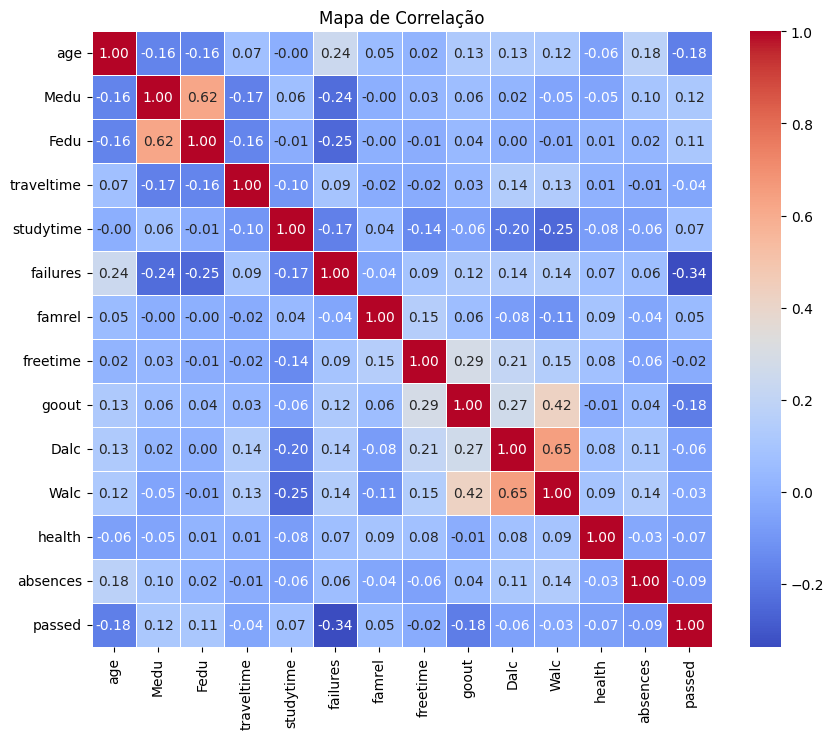

In [14]:
# Calcula a correlação entre as variáveis numéricas e a feature 'passed'
correlation_matrix = numeric_df.corr()

# Faz um mapa de calor para visualizar as correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

In [15]:
from scipy.stats import chi2_contingency

# Seleciona colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Conta os valores únicos e exibe os resultados
for col in categorical_columns:
    value_counts = df[col].value_counts()


    # Função para verificar a relação entre variáveis categóricas e a feature 'passed'
    def check_relationship_with_passed(df, categorical_columns):
        for col in categorical_columns:
            contingency_table = pd.crosstab(df[col], df['passed'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f"Relação entre {col} e 'passed':")
            print(f"Chi2: {chi2}, p-valor: {p}")
            if p < 0.1:
                print(f"Há uma relação significativa entre {col} e 'passed' (p < 0.1).\n")
            else:
                print(f"Não há uma relação significativa entre {col} e 'passed' (p >= 0.1).\n")

    # Chama a função para verificar as relações
    check_relationship_with_passed(df, categorical_columns)
    check_relationship_with_passed(df, ['guardian'])


Relação entre school e 'passed':
Chi2: 0.20633910759821295, p-valor: 0.6496520320478856
Não há uma relação significativa entre school e 'passed' (p >= 0.1).

Relação entre sex e 'passed':
Chi2: 1.680311069367968, p-valor: 0.19488312384342535
Não há uma relação significativa entre sex e 'passed' (p >= 0.1).

Relação entre address e 'passed':
Chi2: 0.8288776986104667, p-valor: 0.36259725500729156
Não há uma relação significativa entre address e 'passed' (p >= 0.1).

Relação entre famsize e 'passed':
Chi2: 0.5089949500770806, p-valor: 0.47557425845124546
Não há uma relação significativa entre famsize e 'passed' (p >= 0.1).

Relação entre Pstatus e 'passed':
Chi2: 0.48991628472224347, p-valor: 0.483964650286848
Não há uma relação significativa entre Pstatus e 'passed' (p >= 0.1).

Relação entre Mjob e 'passed':
Chi2: 5.3031673070196845, p-valor: 0.2575805731620897
Não há uma relação significativa entre Mjob e 'passed' (p >= 0.1).

Relação entre Fjob e 'passed':
Chi2: 2.080416181979764, p-v

## Tratamento de Outliers

Número de outliers severos por coluna:
 age            0
Medu           0
Fedu           0
traveltime     0
studytime      0
failures      83
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       3
passed         0
dtype: int64


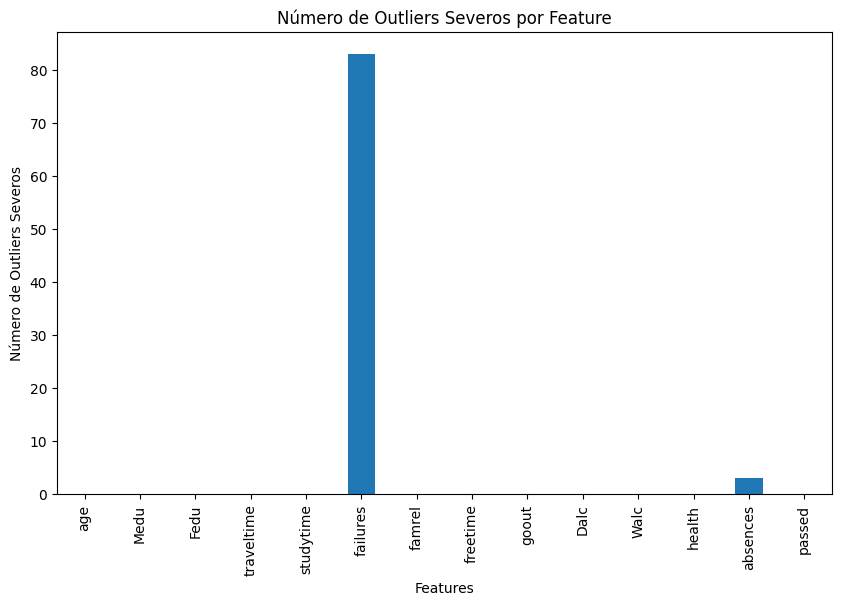

In [16]:
numeric_df = df.select_dtypes(include=['number'])
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_df = df[numeric_cols]
# Identifica outliers usando o método do IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define limites para outliers severos
lower_bound_severe = Q1 - 4 * IQR
upper_bound_severe = Q3 + 4 * IQR

# Assinala os outliers severos por coluna
outliers_severe = ((numeric_df < lower_bound_severe) | (numeric_df > upper_bound_severe))

# Conta o número de outliers severos por coluna
outliers_severe_count = outliers_severe.sum()
print("Número de outliers severos por coluna:\n", outliers_severe_count)

# Faz um gráfico de barras com o número de outliers severos por feature
outliers_severe_count.plot(kind='bar', figsize=(10, 6), title='Número de Outliers Severos por Feature')
plt.xlabel('Features')
plt.ylabel('Número de Outliers Severos')
plt.show()

In [17]:
# Cria uma cópia do dataframe original para não afetar df
df_winsor = df.copy()

# Aplica winsorização por quantil 95% na coluna de reprovações
col = 'failures'  # Substitua se a coluna tiver outro nome
q95 = df_winsor[col].quantile(0.95)
df_winsor[col] = df_winsor[col].clip(upper=q95)

# Verifica resultado
df_winsor[col].describe()

count    395.000000
mean       0.293671
std        0.612754
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: failures, dtype: float64

# Algoritmos

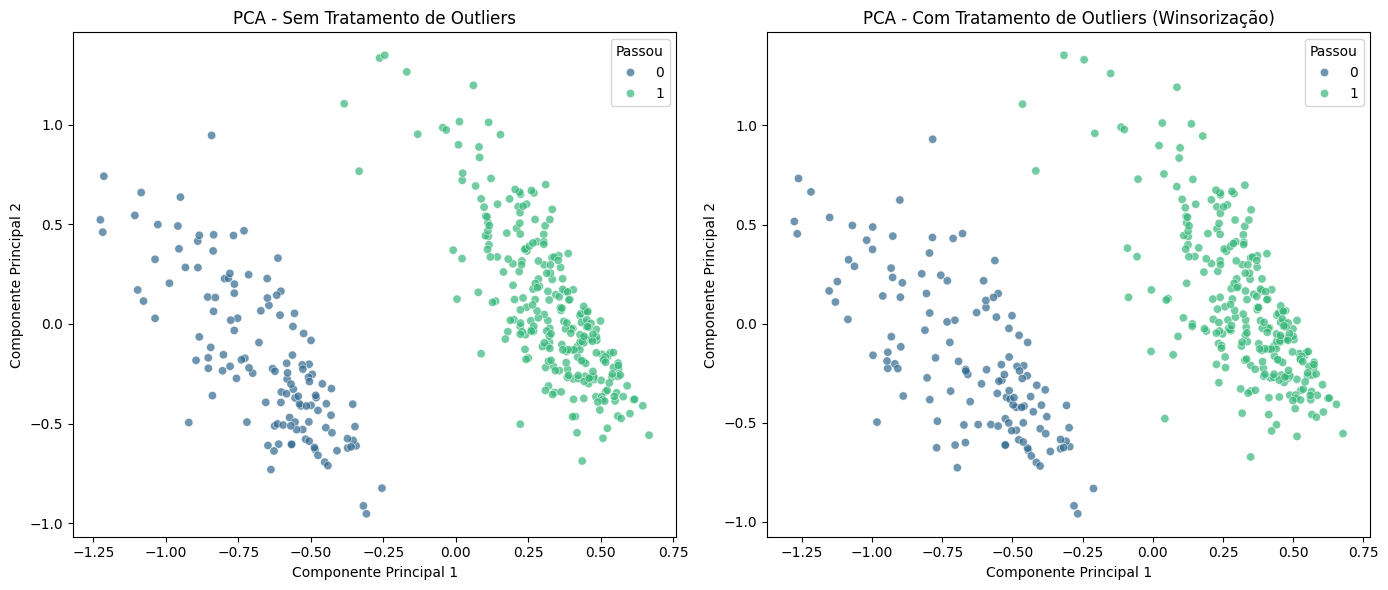

In [18]:
scaler = MinMaxScaler()
numeric_scaled_winsor = scaler.fit_transform(df_winsor[numeric_cols])
numeric_scaled_original = scaler.fit_transform(df[numeric_cols])

# 9. Aplicação de PCA nos dados winsorizados
pca = PCA(n_components=2)
pca_result_winsor = pca.fit_transform(numeric_scaled_winsor)

# Criar DataFrame com os resultados do PCA (winsorizado)
pca_df_winsor = pd.DataFrame(data=pca_result_winsor, columns=['PC1', 'PC2'])
# Adiciona a coluna 'passed' para análise (assumindo que existe no df original)
pca_df_winsor['passed'] = df['passed']

# 10. Aplicação de PCA nos dados originais para comparação
pca_original = PCA(n_components=2)
pca_result_original = pca_original.fit_transform(numeric_scaled_original)

# Criar DataFrame com os resultados do PCA (original)
pca_df_original = pd.DataFrame(data=pca_result_original, columns=['PC1', 'PC2'])
pca_df_original['passed'] = df['passed']

# 11. Visualização comparativa dos resultados PCA
plt.figure(figsize=(14, 6))

# Subplot para dados originais
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df_original, x='PC1', y='PC2', hue='passed', palette='viridis', alpha=0.7)
plt.title('PCA - Sem Tratamento de Outliers')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Passou')

# Subplot para dados com winsorização
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df_winsor, x='PC1', y='PC2', hue='passed', palette='viridis', alpha=0.7)
plt.title('PCA - Com Tratamento de Outliers (Winsorização)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Passou')

plt.tight_layout()
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Separar as features e o target
X = numeric_scaled_original  # Dados sem tratamento de outliers
y = df['passed']  # Target

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

# Treinar o modelo
svm_model.fit(X_train, y_train)

# Fazer previsões
y_pred = svm_model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Verificar a distribuição das classes
print(y.value_counts())

# Validação cruzada para evitar erro de divisão de dados
scores = cross_val_score(svm_model, X, y, cv=5)
print("Validação cruzada acurácias:", scores)
print("Validação cruzada média de acurácia:", np.mean(scores))

Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        73

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

passed
1    265
0    130
Name: count, dtype: int64
Validação cruzada acurácias: [1. 1. 1. 1. 1.]
Validação cruzada média de acurácia: 1.0
